In [6]:
# 二维表DataFrame的创建方式
import pandas as pd
import numpy as np
from numpy.conftest import dtype

#通过两个Series创建DataFrame
s1=pd.Series([1,2,3,4,5])
s2=pd.Series([6,7,8,9,10])
df=pd.DataFrame({'第一列':s1,'第二列':s2})
print(df)
#通过字典创建DataFrame
df1=pd.DataFrame(
    {
        "id":['a','b','c','d'],
        "name":['dede','bd','cd','dfg'],
        "age":[12,23,43,12]
    },index=[1,2,3,4],columns=['id','name','age']
)
print(df1)

   第一列  第二列
0    1    6
1    2    7
2    3    8
3    4    9
4    5   10
  id  name  age
1  a  dede   12
2  b    bd   23
3  c    cd   43
4  d   dfg   12


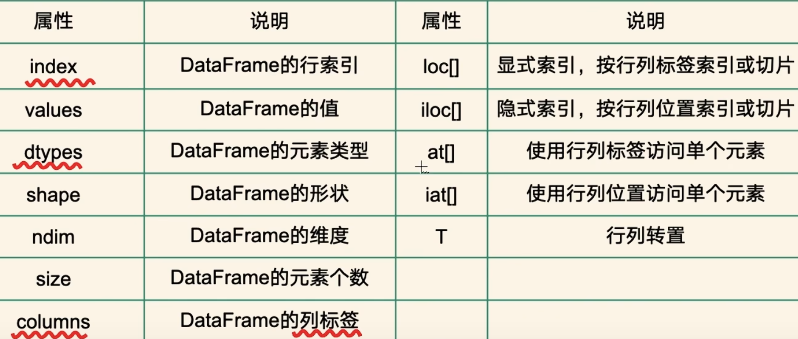

In [18]:
print(f'行索引：{df1.index}')
print(f'列标签：{df1.columns}')
print(f'元素类型：{df1.dtypes}')
print(f'形状：{df1.shape}')
print(f'dataframe的值：“{df1.values}') #值是通过矩阵表示出来
print(f'显式索引\n{df1.loc[:,'id']}') #通过DataFrame的表名来访问
print(f'隐式索引\n{df1.iloc[:,2]}')  #通过矩阵位置访问第二列所有元素age这一列，id的第0列
print(f'访问单个元素：{df1.at[1,'name']}')  #通过行列索引和标签访问
print(f'转置后的DataFrame\n{df1.T}') #转置后的行和列都会变化,生成新的表不是在原本的表上修改
print(df1)

行索引:Index([1, 2, 3, 4], dtype='int64')
列标签Index(['id', 'name', 'age'], dtype='object')
元素类型id      object
name    object
age      int64
dtype: object
形状(4, 3)
dataframe的值[['a' 'dede' 12]
 ['b' 'bd' 23]
 ['c' 'cd' 43]
 ['d' 'dfg' 12]]
显式索引
1    a
2    b
3    c
4    d
Name: id, dtype: object
隐式索引
1    12
2    23
3    43
4    12
Name: age, dtype: int64
访问单个元素：dede
转置后的DataFrame
         1   2   3    4
id       a   b   c    d
name  dede  bd  cd  dfg
age     12  23  43   12
  id  name  age
1  a  dede   12
2  b    bd   23
3  c    cd   43
4  d   dfg   12


In [52]:
# 获取单列的数据
print(df1[['name']])  #两层括号因为是二维表
print(df1.name)
# 获取多列数据 两层中括号
print(df1[['name','age']])

   name
1  dede
2    bd
3    cd
4   dfg
1    dede
2      bd
3      cd
4     dfg
Name: name, dtype: object
   name  age
1  dede   12
2    bd   23
3    cd   43
4   dfg   12


In [29]:
#获取部分数据
print(df1.head(3))
print(df1.tail(3))
#随机抽样几条数据全部列部分行
print(df1.sample(2))
#布尔索引筛选数据
df1[df1.age>12]

  id  name  age
1  a  dede   12
2  b    bd   23
3  c    cd   43
  id name  age
2  b   bd   23
3  c   cd   43
4  d  dfg   12
  id name  age
3  c   cd   43
2  b   bd   23


,id,name,age
2,b,bd,23
3,c,cd,43


In [74]:
"""
1. 计算找出每位学生的总分和平均分
2，找出数学成绩高于90或英语成绩高于80的学生
3. 按照总分从高到低排序，并输出前3名学生
"""
data={
    '姓名':['张1','李2','王3','赵4','刘5'],
    '数学':[76,87,98,100,91],
    '英语':[65,67,87,93,80],
    '物理':[65,35,67,87,99]
    }
score=pd.DataFrame(data)
# 1. 计算找出每位学生的总分和平均分
score['总分']=score[['数学','英语','物理']].sum(axis=1) #列数新加一个总分axis为1是横着求和
score['平均分']=score[['数学','英语','物理']].mean(axis=1) #平均分axis为1是横着求三个平均分
score['平均分1']=score['总分']/3
limit=score[ (score['数学'] > 90) | (score['英语'] > 80)]
print(limit)
# 3. 按照总分从高到低排序，并输出前3名学生
score.sort_values('总分',ascending=False).head(3)
score.nlargest(3,columns='总分')

# score


   姓名   数学  英语  物理   总分        平均分       平均分1
2  王3   98  87  67  252  84.000000  84.000000
3  赵4  100  93  87  280  93.333333  93.333333
4  刘5   91  80  99  270  90.000000  90.000000


,姓名,数学,英语,物理,总分,平均分,平均分1
3,赵4,100,93,87,280,93.333333,93.333333
4,刘5,91,80,99,270,90.000000,90.000000
2,王3,98,87,67,252,84.000000,84.000000


In [11]:
'''
    1 计算没种产品的总销售额（单价x销量）
    2 找出销售额最高的产品
    3 销售额从高到底并输出所有产品信息
'''
import pandas as pd
import numpy as np

data={
    '产品名称':['A','B','C','D'],
    '单价':[100,150,200,120],
    '销量':[50,30,20,40]
}
sales=pd.DataFrame(data)
#1.销售额
sales['销售额']=sales['单价']*sales['销量']
print(sales)
#2.销量最高
sales.nlargest(1,columns='销售额')
sales.sort_values('销售额',ascending=False)

  产品名称   单价  销量   销售额
0    A  100  50  5000
1    B  150  30  4500
2    C  200  20  4000
3    D  120  40  4800


,产品名称,单价,销量,销售额
0,A,100,50,5000
3,D,120,40,4800
1,B,150,30,4500
2,C,200,20,4000


In [27]:
'''
1. 计算每位用户的总消费金额（商品单价 x 购买数量）
2. 找出消费金额最高的用户，并输出所有信息
3. 计算所有用户的平均消费金额（保留两位小数）
4. 统计电子产品的总购买数量
'''
data={
    '用户ID':[101,102,103,104,105],
    '用户名':['Alice','Bob','Charlie','David','Eve'],
    '商品类别':['电子产品','服饰','电子产品','家居','服饰'],
    '商品单价':[1200,300,800,150,200],
    '购买数量':[1,3,2,5,4]
}
user_data=pd.DataFrame(data)
user_data['总消费金额']=user_data['商品单价']*user_data['购买数量']
user_data.nlargest(1,columns='总消费金额')
user_data['平均消费金额']=user_data['总消费金额'].sum()/5
user_data[user_data['商品类别']=='电子产品']['购买数量'].sum()


np.int64(3)